# 2-dimensional representation

Ensembles of neurons represent information.
In Nengo, we represent that information with
real-valued vectors -- lists of numbers.
In this example, we will represent a two-dimensional vector
with a single ensemble of leaky integrate-and-fire neurons.

## Step 1: Create the network

Our model consists of a single ensemble,
which we will call `Neurons`.
It will represent a two-dimensional signal.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo

model = nengo.Network(label='2D Representation')
with model:
    # Our ensemble consists of 100 leaky integrate-and-fire neurons,
    # and represents a 2-dimensional signal
    neurons = nengo.Ensemble(100, dimensions=2)

## Step 2: Provide input to the model

The signal that an ensemble represents varies over time.
We will use a simple sine and cosine wave
as examples of continuously changing signals.

In [2]:
with model:
    # Create input nodes representing the sine and cosine
    sin = nengo.Node(output=np.sin)
    cos = nengo.Node(output=np.cos)

## Step 3: Connect the input to the ensemble

In [3]:
with model:
    # The indices in neurons define which dimension the input will project to
    nengo.Connection(sin, neurons[0])
    nengo.Connection(cos, neurons[1])

## Step 4: Probe outputs

Anything that is probed will collect the data it produces over time,
allowing us to analyze and visualize it later.
Let's collect all the data produced.

In [4]:
with model:
    sin_probe = nengo.Probe(sin, 'output')
    cos_probe = nengo.Probe(cos, 'output')
    neurons_probe = nengo.Probe(neurons, 'decoded_output', synapse=0.01)

## Step 5: Run the model

In order to run the model, we have to create a simulator.
Then, we can run that simulator over and over again
without affecting the original model.

In [5]:
with nengo.Simulator(model) as sim:
    sim.run(5)

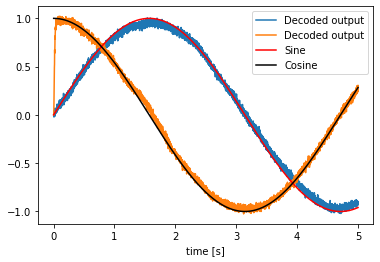

In [6]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[neurons_probe], label="Decoded output")
plt.plot(sim.trange(), sim.data[sin_probe], 'r', label="Sine")
plt.plot(sim.trange(), sim.data[cos_probe], 'k', label="Cosine")
plt.legend()
plt.xlabel('time [s]');